# Data Technology - Assignment

## Part A - Importing and Understanding the Data

In [4]:
# Load python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Load the Data
df = pd.read_csv('zomato_df_final_data.csv')
# First five rows
df.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

In [6]:
# Check NA values
df.isna().sum()

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

In [7]:
#Dropping rows with missing value 
df = df.dropna()

### 1.1.How many unique cuisine are surved by the sydney restaurants?

In [8]:
df.cuisine.nunique()

1340

### 1.2.Which suburbs have the highest number of restaurants?

In [9]:
suburbs=df.groupby(['subzone'])['subzone'].count()
suburbs.nlargest(3)

subzone
CBD             342
Surry Hills     226
Darlinghurst    147
Name: subzone, dtype: int64

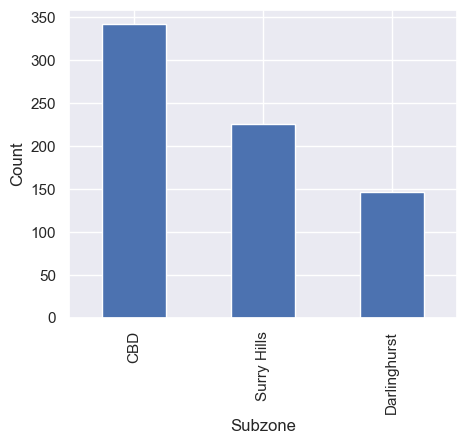

In [42]:
# Plot the result
plt.figure(figsize=(5,4))
suburbs.nlargest(3).plot.bar()
plt.ylabel('Count')
plt.xlabel('Subzone');

CBD, Surry Hills and Parramattta has the highest number of restaurant

### 1.3.Restaurants with excellent rating are mostly expensive while those with poor rating are rarely expensive

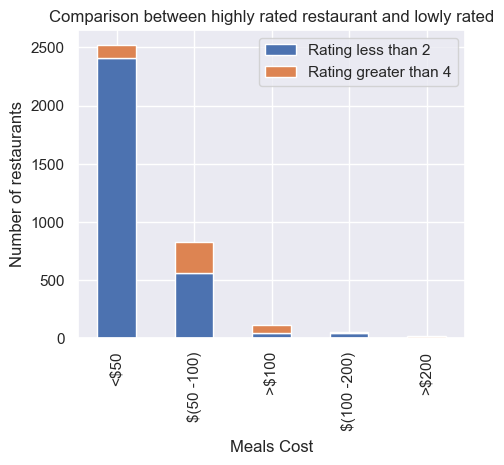

<Figure size 800x600 with 0 Axes>

In [43]:
import warnings
warnings.filterwarnings('ignore')

# Find the number of restaurants with excellent rating 
rating_df = df['rating_number'].value_counts()
#Create a function for classifying restaurants based on rate 

rating_greater4 = df.loc[df['rating_number'] > 4.0]
#Value is 369
# #Select all restaurants that the meal is greater than 100 
mealover_100 = rating_greater4.loc[rating_greater4['cost'] > 100.0]
# #Value is 66

# #Select all restaurants that the meal is less than 50 but rating is greater than 4 
cheap_meal = rating_greater4.loc[rating_greater4 ['cost'] <50.0].count()
cheap_meal
 #value is 112

# #Select all restaurants that the meal is less more than 50 but less than 100 basically moderate but rating is greater than 4 
moderate =rating_greater4['cost'].between(51.0, 100.0, inclusive=False)
moderate.count()
#there is 369


#Restaurants with very expensive meal 
rating_greater4.loc[rating_greater4['cost'] > 200].count()

#meals greater than $200 = 15

#Restaurants with mid expensive meals but rating is mor than 4
mid_expensive = rating_greater4['cost'].between(100.0,200.0, inclusive=False).value_counts()
mid_expensive.count()

# mid expensive meals = 2

#Select all restaurants with rating of less than 2 
rating_less2 = df.loc[df['rating_number'] < 2.0]

#restaurants with rating less than 2 are 3323

#Select all restaurants with rating less than 2 that cost less than 30
mealless_30 =rating_less2.loc[rating_less2['cost'] < 50.0]
mealless_30.count()
#2411 meals cost less than $50  in restaurants that have a rating of less than 2 

#Select all restaurants that rate less than 2 but cost between 30 - 50 dollars
mid_meal = rating_less2['cost'].between(50.0, 100.0, inclusive=False)
mid_meal.value_counts()

# #Mid meals from cheap restaurants = 562

#Select all restaurants with meals over $100 but rating is less than 2  

expensive_meal = rating_less2.loc[rating_less2['cost'] > 100.0]
expensive_meal.count()

#Expensive meals with rating less than 2 = 48

#Restaurants with midexpensive meals
rating_less2['cost'].between(100.0,200.0, inclusive=False).value_counts()

#Restaurants with very expensive meal 
rating_less2.loc[rating_less2['cost'] > 200].count()



rest_df = pd.DataFrame({
    'Rating less than 2': [2411,562,48,47,1],
    'Rating greater than 4': [112,269,66,2,15]
    },
    index = ['<$50','$(50 -100)',' >$100', ' $(100 -200)','>$200'])
rest_df.head();
rest_df.plot(kind='bar', stacked=True);
plt.title("Comparison between highly rated restaurant and lowly rated");
plt.xlabel("Meals Cost");
plt.ylabel("Number of restaurants");
plt.show();
plt.figure(figsize=(8, 6));

### 2.1. Exploratory analysis of the variables of the data of Cost

<AxesSubplot: xlabel='cost', ylabel='Density'>

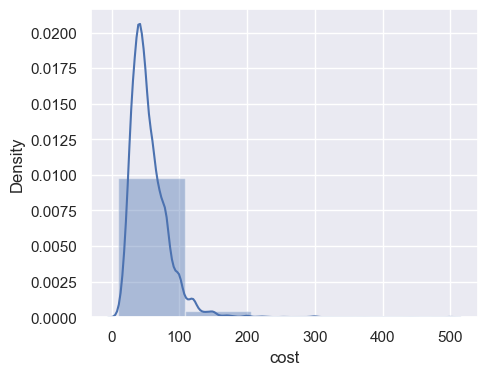

In [44]:
#Cost data exploratory 
factor = 3
upper_lim = df['cost'].mean()+ df['cost'].std() * factor 
lower_lim = df['cost'].mean() - df['cost'].std() * factor

upper_lim
lower_lim
# df = [(df['cost'] < upper_lim)] & (df['cost'] > lower_lim)
df.describe()

#The mean value(51) is more than the median value(45) for cost 

#Find the unique costs in the data 
#The data has 84 unique costs

len(df.cost.unique())
df.cost.value_counts().to_dict()
#Majority of the foods cost 40 dollars

df.ndim
#Data has 2 dimensions

#This data has 572 unique suburb restaurant spots
len(df.subzone.unique())

#Check the skewness of the cost varibal
sns.set(rc = {'figure.figsize':(5,4)})
sns.distplot(df['cost'],bins=5)

Cost is positively skewed as most of the cost points are leaning towards the right.Most of the meals are costing btwn 0 - 100 dollars and very few btwn 100 -200

<AxesSubplot: >

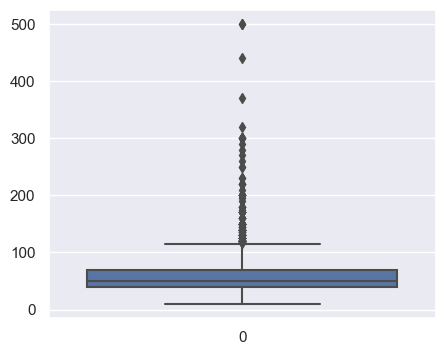

In [45]:
#Outlier analysis with box plots 
sns.boxplot(df['cost'])

Most outliers lie past meals that cost over 150 dollars

<AxesSubplot: >

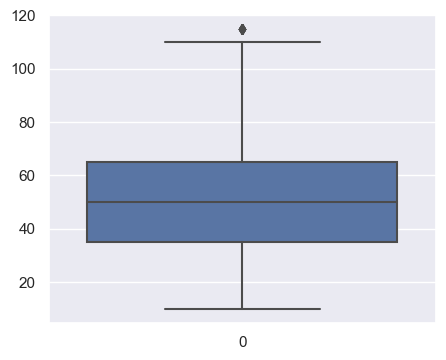

In [46]:
len(df.loc[df['cost'] > 150])
q1 = df['cost'].quantile(0.25)
q3 = df['cost'].quantile(0.75)

#Interquartile range
iqr = q3 - q1 

fence_low = q1 - (1.5 * iqr)
fence_high = q3 + (1.5 * iqr)


# "Outside" boxplot Reviews
df['cost'][(df['cost'] < fence_low) | (df['cost'] > fence_high)].shape[0]

sns.boxplot(df['cost'][(df['cost'] >= fence_low) & (df['cost']<= fence_high)])

### 2.2.Explaratory analysis on  the rating variable

<AxesSubplot: xlabel='rating_number', ylabel='Density'>

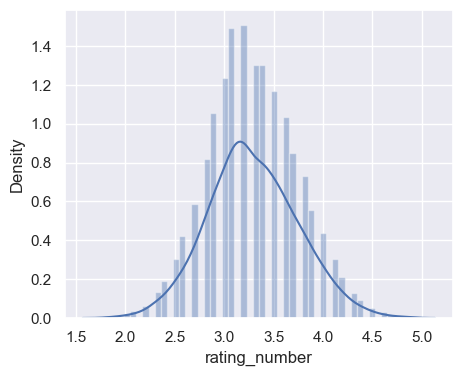

In [38]:
# Find the number of unique ratings
len(df.rating_number.unique())
#the data has 33 unique ratings

df.rating_number.value_counts().to_dict()
#Majority of the restaurants rate at 3.2 with 673 of them rated that way

# df.ndim
# #Data has 2 dimensions

#Check the skewness of the cost variale
sns.distplot(df['rating_number'])

The ratings are well distributed hence based on the distribution plot

<AxesSubplot: >

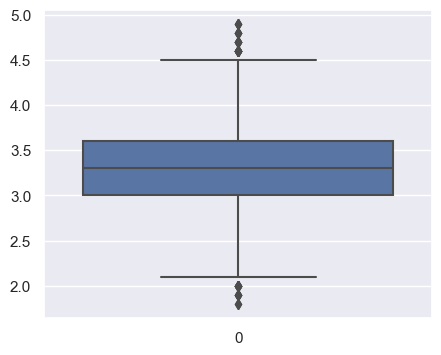

In [39]:
# #Outlier analysis with box plots 
sns.boxplot(df['rating_number'])

Most of the outliers lie before the rating 1.5 and after the rating 4.5

<AxesSubplot: >

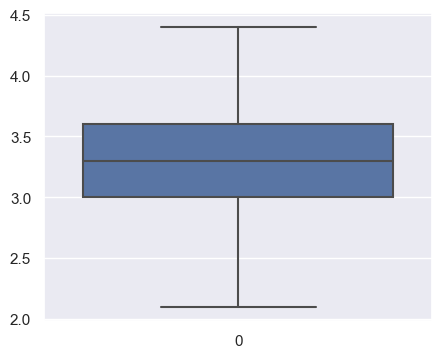

In [40]:
#Get the number of ratings that are below 1.5 and above 4.5

len(df.loc[df['rating_number'] > 4.5])
#There are 29 ratings that lie above 4.5

# #Remove outliers
ratingnumber =df.loc[df['rating_number'] < 4.5]

q1 = ratingnumber['rating_number'].quantile(0.25)
q3 = ratingnumber['rating_number'].quantile(0.75)
#Interquartile range
iqr = q3 - q1 

fence_low = q1 - (1.5 * iqr)
fence_high = q3 + (1.5 * iqr)

iqr
fence_low 
fence_high 

# "Outside" boxplot Reviews
ratingnumber['rating_number'][(ratingnumber['rating_number'] < fence_low) | (ratingnumber['rating_number'] > fence_high)].shape[0]

#There are 17 outside the box plots

sns.boxplot(ratingnumber['rating_number'][(ratingnumber['rating_number'] >= fence_low) & (ratingnumber['rating_number']<= fence_high)])


### 2.3.Exploratory analysis on The type variable

In [16]:
# Find the number of unique types
len(df.type.unique())

54

The data has 54 unique restaurant types

In [17]:
df.type.value_counts()

['Casual Dining']                       3555
['Café']                                1689
['Fast Food']                            257
['Food Court']                           205
['Pub']                                  194
['Casual Dining', 'Bar']                 192
['Bar']                                  162
['Fine Dining']                           82
['Café', 'Casual Dining']                 80
['Casual Dining', 'Café']                 75
['Bar', 'Casual Dining']                  74
['Pub', 'Casual Dining']                  47
['Casual Dining', 'Wine Bar']             46
['Bakery']                                38
['Café', 'Bar']                           24
['Casual Dining', 'Pub']                  23
['Bakery', 'Café']                        22
['Bar', 'Wine Bar']                       20
['Café', 'Bakery']                        18
['Dessert Parlour', 'Café']               18
['Dessert Parlour']                       14
['Café', 'Wine Bar']                       9
['Fast Foo

Majority of the restaurants are based on casual dinings having 3555 restaurants 

### 3.Produce cuisine density map

In [92]:
import geopandas as gpd
# Load the data
df_poly = gpd.read_file('sydney.geojson')
df_poly.head()

SSC_CODE          SSC_NAME CONF_VALUE      SQKM  \
0    10001        Abbotsbury  Very good  4.984673   
1    10002  Abbotsford (NSW)  Very good  1.017855   
2    10010    Acacia Gardens  Very good  0.946630   
3    10016             Airds  Very good  2.380773   
4    10022        Alexandria  Very good  3.503330   

                                            geometry  
0  POLYGON ((150.85118 -33.87069, 150.85104 -33.8...  
1  POLYGON ((151.12593 -33.84578, 151.12678 -33.8...  
2  POLYGON ((150.90781 -33.73547, 150.90799 -33.7...  
3  POLYGON ((150.84000 -34.07817, 150.84077 -34.0...  
4  POLYGON ((151.18603 -33.91660, 151.18562 -33.9...

<AxesSubplot: >

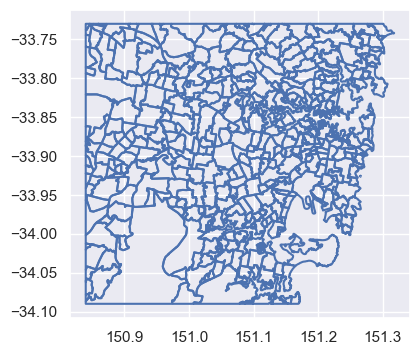

In [93]:
# Boundry plot
df_poly["geometry"].boundary.plot(figsize=(5,4))

In [167]:
from shapely.geometry import Point
from geopandas import GeoDataFrame
# Load the Data
df = pd.read_csv('zomato_df_final_data.csv')
# First five rows
df=df.dropna()
geometry = [Point(xy) for xy in zip(df['lng'], df["lat"])]
crs = {'init': 'epsg:4326'}
df_point = GeoDataFrame(df, crs=crs, geometry=geometry)
df_point.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  \
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b   
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b   
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b   
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4   
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b   

                      geometry  
0  POINT (151.20760 -33.87606)  
1  POINT (151.19379 -33.91100)  
2  POINT (151.19521 -33.86797)  
3  POINT (151.21530 -33.85678)  
4  POINT (151.20641 -33.87904)

In [168]:
# Join the two data frames
df = df_poly.sjoin(df_point, how="inner", predicate='intersects')
df.columns

Index(['SSC_CODE', 'SSC_NAME', 'CONF_VALUE', 'SQKM', 'geometry', 'index_right',
       'address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')

In [193]:
# Create the function for plot the density map
def show_cuisine_densitymap(cuisine='India'):
    df1=df[df['cuisine'].str.contains('India')]
    df1.groupby(['subzone'])['cuisine'].count()
    df1.plot(cmap='OrRd')

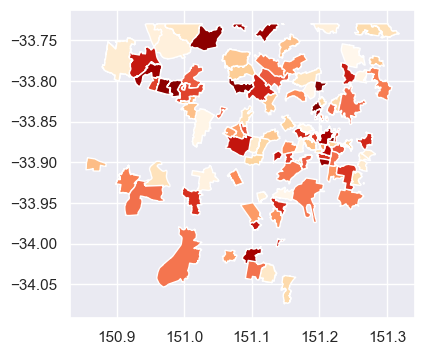

In [194]:
# Density map for Chinees cuisine
show_cuisine_densitymap('Chinees')

## Part B - Predictive Modeling

### 1.Feature Engineering

In [195]:
# Load python libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [196]:
# Load the data set
df = pd.read_csv('zomato_df_final_data.csv')

#Numeric aggregations
grouped_df = df.groupby('groupon')

df[['rating_mean','cost_mean']] = grouped_df[['rating_number', 'cost']].transform('mean')
df[['rating_std','cost_std']] = grouped_df[['rating_number', 'cost']].transform('std')
df[['cuisine_count','votes_count']] = grouped_df[['cuisine', 'votes']].transform('count')

df[['rating_mean','cost_mean','rating_std','cost_std','cuisine_count','votes_count']].head(5)

df['log_cost'] = np.log(df['cost'] + 1)
df['cost_squared'] = np.square(df['cost'])

#Find if the data has missing values
df.dropna(axis=1,how='any',inplace = False)

#Log transforming
df['log+1'] = (df['cost']+1).transform(np.log) 

#Label encoding 
from sklearn import preprocessing
# creating instance of labelencoder
label_encoder =  preprocessing.LabelEncoder() 
# from sci-kit learn library

# Assigning numerical values and storing in another column 
#Encode labels in 
df['rating_text'] = label_encoder.fit_transform(df['rating_text'])

df['rating_text'].unique()

array([4, 1, 2, 0, 3, 5])

### 2.Regression

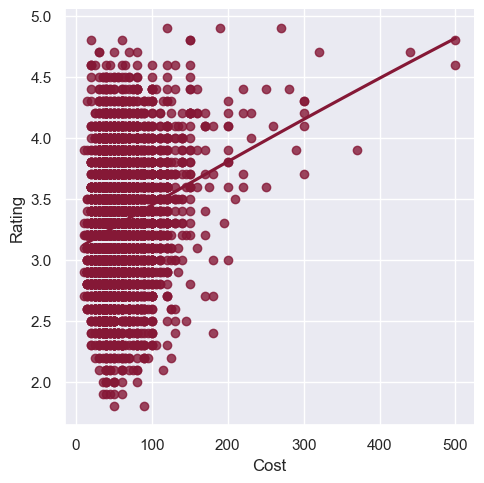

In [197]:
#Reading the dataset 
df = pd.read_csv('zomato_df_final_data.csv')
df_binary = df[['cost','rating_number']]

#Taking only the selectd two attributes from the dataset
df_binary.columns = ['Cost','Rating']

#display the first 5 rows
df_binary.head()

#plotting the scatter plot to check relationship between cost and rating
sns.set_theme()
sns.set_palette(sns.color_palette(['#851836', '#edbd17']))
sns.set_style("darkgrid")
sns.lmplot(x="Cost", y="Rating", data = df_binary, order = 2, ci = None)

0.09730783045695568


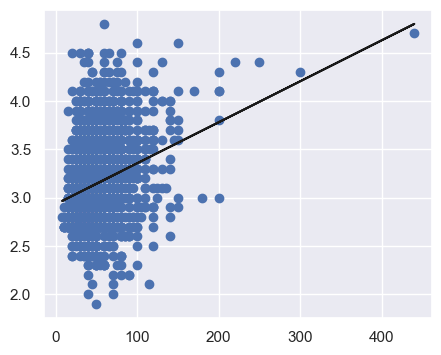

In [198]:
#Data cleaning by eliminating Nan or missing input numbers
df_binary.fillna(method ='ffill', inplace = True)

#Training the model
x = np.array(df_binary['Cost']).reshape(-1,1)
y = np.array(df_binary['Rating']).reshape(-1,1)

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df_binary.dropna(inplace=True)

#Dropping any rows with Nan values
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size = 0.20)

# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))

#Exploring our results
y_pred = regr.predict(x_test)
plt.scatter(x_test, y_test, color ='b')
plt.plot(x_test, y_pred, color ='k')
  
plt.show()

In [199]:
#Evaluation metrics for regression
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.3272502468597432
MSE: 0.17141050894239854
RMSE: 0.4140175225064738


100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??y
MSE of gradient scope 0.17141050894239854


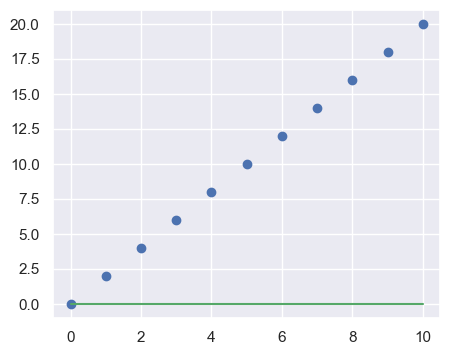

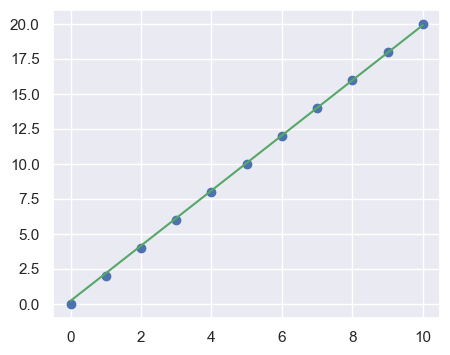

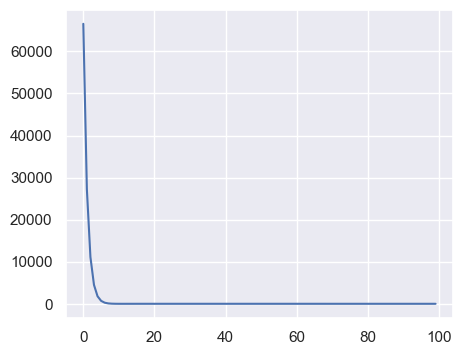

In [200]:
#Regression using the gradient descent as optimization  function
class Linear_Regression: 
    def __init__(self, X, Y): 
        self.X = X 
        self.Y = Y 
        self.b = [0, 0] 
      
    def update_coeffs(self, learning_rate): 
        Y_pred = self.predict() 
        Y = self.Y 
        m = len(Y) 
        self.b[0] = self.b[0] - (learning_rate * ((1/m) *
                                np.sum(Y_pred - Y))) 
  
        self.b[1] = self.b[1] - (learning_rate * ((1/m) *
                                np.sum((Y_pred - Y) * self.X))) 
    def predict(self, X=[]): 
        Y_pred = np.array([]) 
        if not X: X = self.X 
        b = self.b 
        for x in X: 
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x)) 

        return Y_pred 
    def get_current_accuracy(self, Y_pred): 
        p, e = Y_pred, self.Y 
        n = len(Y_pred) 
        return 1-sum( 
            [ 
                abs(p[i]-e[i])/e[i] 
                for i in range(n) 
                if e[i] != 0] 
        )/n 
    #def predict(self, b, yi): 
  
    def compute_cost(self, Y_pred): 
        m = len(self.Y) 
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2) 
        return J 
  
    def plot_best_fit(self, Y_pred, fig): 
                f = plt.figure(fig) 
                plt.scatter(self.X, self.Y, color='b') 
                plt.plot(self.X, Y_pred, color='g') 
                f.show() 
  
  
def main(): 
    X = np.array([i for i in range(11)]) 
    Y = np.array([2*i for i in range(11)]) 
  
    regressor = Linear_Regression(X, Y) 
  
    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = [] 
      
    #original best-fit line 
    Y_pred = regressor.predict() 
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line') 
      
  
    while 1: 
        Y_pred = regressor.predict() 
        cost = regressor.compute_cost(Y_pred) 
        costs.append(cost) 
        regressor.update_coeffs(learning_rate) 
          
        iterations += 1
        if iterations % steps == 0: 
            print(iterations, "epochs elapsed") 
            print("Current accuracy is :", 
                regressor.get_current_accuracy(Y_pred)) 
  
            stop = input("Do you want to stop (y/*)??") 
            if stop == "y": 
                print(f"MSE of gradient scope",mean_squared_error(y_true=y_test,y_pred=y_pred))
                break
  
    #final best-fit line 
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line') 
  
    #plot to verify cost function decreases 
    h = plt.figure('Verification') 
    plt.plot(range(iterations), costs, color='b') 
    h.show() 
  
    # if user wants to predict using the regressor: 
    regressor.predict([i for i in range(10)]) 
  
if __name__ == '__main__': 
    main() 

### Classification

In [201]:
import warnings
warnings.filterwarnings('ignore')

#Import all required libraries
from sklearn import preprocessing, svm,linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# creating instance of labelencoder
#Reading the dataset 
df = pd.read_csv('zomato_df_final_data.csv')

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
df.dropna(inplace=True)

#Encode labels in 
label_encoder =  preprocessing.LabelEncoder() 
# from sci-kit learn library

rating_text = label_encoder.fit_transform(df['rating_text'])

#Selecting feature columns
feature_cols = ['cost']

#Reshaping the data
y = np.array(df[feature_cols]).reshape(-1,1)
X = np.array(rating_text).reshape(-1,1)


#Splitting data for training and tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Instantiating the model
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [202]:
#Model evaluation using confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
